# Import train dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('dota2Train.csv', header=None).as_matrix()

In [2]:
def filter_df(dataset):
    real_dataset = []
    for line in dataset:
        values = line[0:4].tolist()
        for i in range(4, len(line)):
            if line[i] == 1:
                values.append(i - 3)
            elif line[i] == -1:
                values.append((i - 3 )* -1)
        values = values[0:4] + sorted(values[4:])
        for i in range(4, 9):
            values[i] *= -1
        values = values[0:4] + sorted(values[4:9]) + values[9:]
        real_dataset.append(values)
    return pd.DataFrame(real_dataset)

In [3]:
real_dataset = filter_df(dataset)
print(real_dataset[0:10])

x = real_dataset.iloc[0:, 4:]
y = real_dataset.iloc[:, 0]

   0    1   2   3   4   5   6   7    8   9   10  11  12   13
0  -1  223   2   2  18  22  38  74   88  10  14  25  28   32
1   1  152   2   2   6  21  35  93   98   4  14  26  27   71
2   1  131   2   2   6  20  46  72   93   4  22  25  32   59
3   1  154   2   2   7  23  42  47  104  17  35  54  62   95
4  -1  171   2   3   6   9  11  29   86  16  31  36  44   73
5   1  122   2   3  12  28  55  70  113   2  57  63  74  104
6   1  224   8   3  18  38  41  55   74  14  22  36  93   96
7  -1  227   8   3   2  62  74  93   98  14  32  34  72   75
8  -1  111   2   3   8  41  64  70   83   3  59  73  81  105
9  -1  151   2   2   8  32  44  84   87   4  30  46  59  106


# Correlation matrix

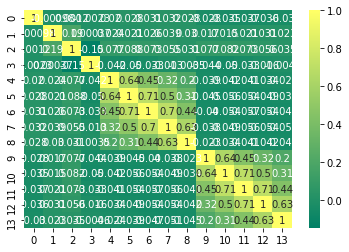

In [4]:
import seaborn as sns

def table_corr(df):
    sns.heatmap(df.corr(), annot=True, cmap='summer')
    plt.show()
    
table_corr(real_dataset)

# Import test dataset

In [5]:
test_df = pd.read_csv('dota2Test.csv', header=None).as_matrix()
dataset_test = filter_df(test_df)

X_testd = dataset_test.iloc[0:, 4:]
y_testd = dataset_test.iloc[:, 0]

# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x, y)

pred = knn.predict(X_testd)

In [7]:
from sklearn.metrics import accuracy_score

acc_knn = accuracy_score(y_testd, pred)
print(acc_knn)

0.515154458908


# Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x, y)
pred_gnb = gnb.predict(X_testd)

In [9]:
acc_gnb = accuracy_score(y_testd, pred_gnb)
print(acc_gnb)

0.525840295318
